# 2. Words as features

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

# 2.1 Processing the dataset and display number of tokens

In [82]:
with open("goemotions.json", "r") as data:
    file = pd.read_json(data)
    
emotion = file[1].value_counts().to_dict()
sentiment = file[2].value_counts().to_dict()

posts = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(posts)

print(f"The size of the vocabulary is {len(X.toarray()[0])}")


The size of the vocabulary is 30449


## 2.2 Split the dataset

In [83]:
#get the location
emo = preprocessing.LabelEncoder()
senti = preprocessing.LabelEncoder()

#vectorizing emotions
emo = emo.fit_transform(file[1]) 
#vectorizing sentiments
senti = senti.fit_transform(file[2]) 

#now splitting the data 
X_train, X_test, Yemo_train, Yemo_test, Ysenti_train, Ysenti_test = train_test_split(X, emo, senti, test_size = 0.2, train_size=0.8)

## 2.3 & 2.4 Classifiers and metrics

### 2.3.1 Base-MNB: Multinomial naive bayes classifier

The performance of Multinomial naive bayes classifier with default parameters for emotions.

              precision    recall  f1-score   support

           0       0.48      0.45      0.47      2163
           1       0.50      0.29      0.36      1201
           2       0.38      0.12      0.19      1019
           3       0.19      0.07      0.10      1664
           4       0.28      0.11      0.16      2222
           5       0.27      0.05      0.09       678
           6       0.28      0.05      0.09       981
           7       0.36      0.09      0.15      1209
           8       0.55      0.05      0.09       462
           9       0.29      0.04      0.06       972
          10       0.21      0.07      0.11      1533
          11       0.42      0.07      0.12       601
          12       0.56      0.02      0.03       294
          13       0.28      0.03      0.06       617
          14       0.57      0.03      0.06       366
          15       0.75      0.67      0.7

/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

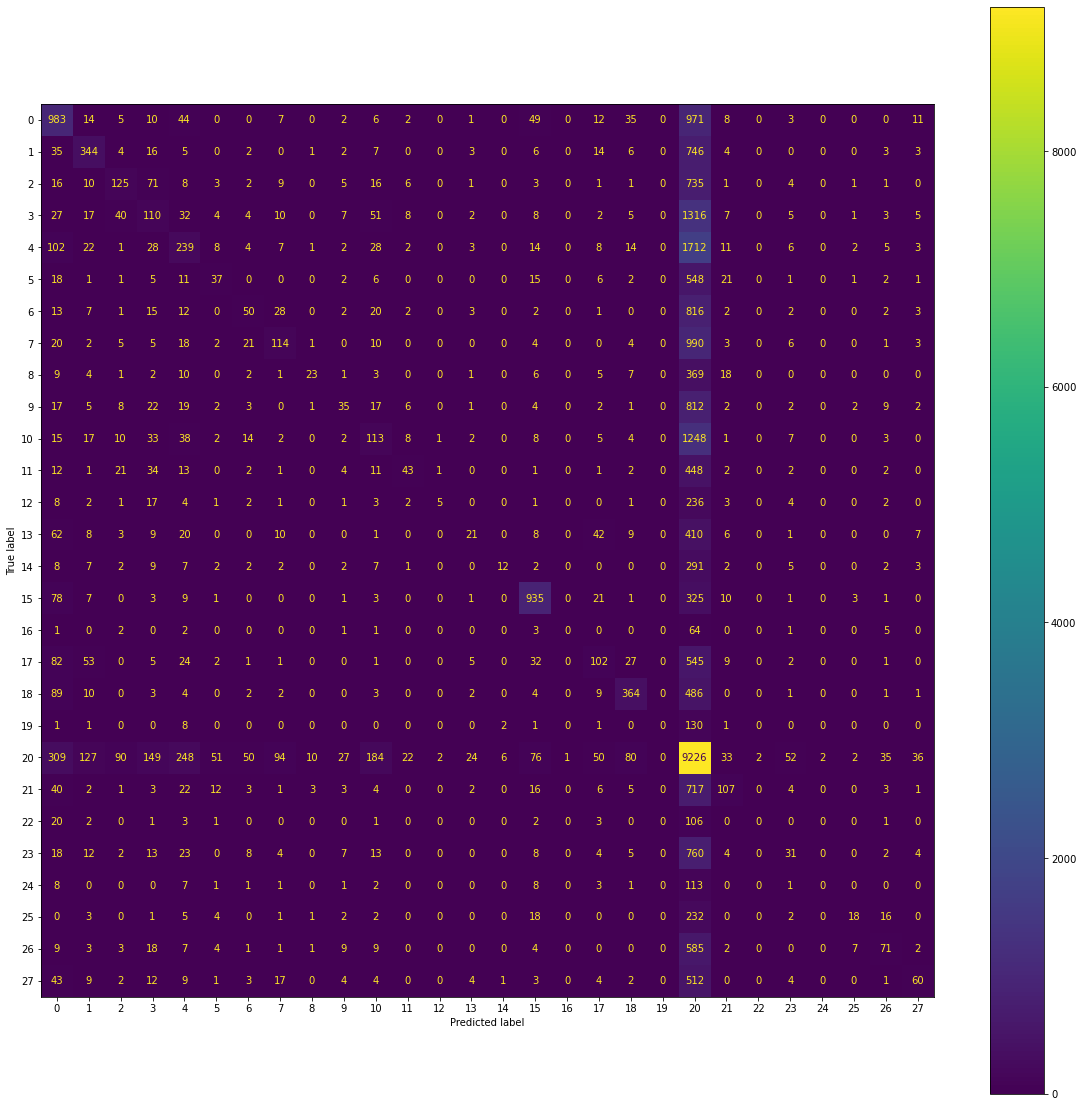

In [112]:
MNB = MultinomialNB()

#for emotions classification
MNBmodel = MNB.fit(X_train, Yemo_train)
pred = MNB.predict(X_test)

print("The performance of Multinomial naive bayes classifier with default parameters for emotions.\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 


The performance of naive bayes classifier with default parameters for sentiments.

              precision    recall  f1-score   support

           0       0.42      0.24      0.30      3803
           1       0.53      0.53      0.53      7715
           2       0.49      0.50      0.49     10988
           3       0.63      0.71      0.66     11858

    accuracy                           0.55     34364
   macro avg       0.52      0.49      0.50     34364
weighted avg       0.54      0.55      0.54     34364



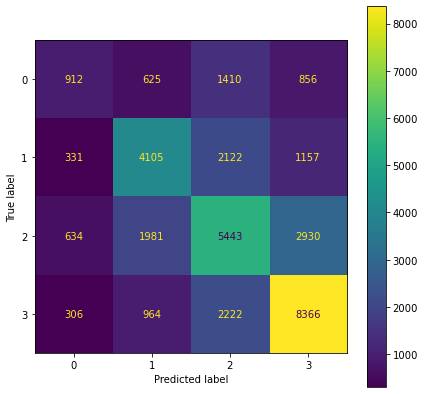

In [101]:
#for sentiments classification
MNBmodel = MNB.fit(X_train, Ysenti_train)
pred = MNB.predict(X_test)

print("The performance of naive bayes classifier with default parameters for sentiments.\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

### 2.3.4 Top-MNB